In [1]:
#import libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
#retrieve cleaned data frames 
%store -r gdf_quarter
%store -r gdf_semi
%store -r gdf_annual

### Sparsity Rate Tables

In [4]:
gdf_annual.shape

(11988, 16)

In [7]:
#annual
sparsity_df_annual = pd.DataFrame(columns=['year', 'Total Deaths', 'Sparsity Rate'])

years = range(2014, 2023)
for year in years:
    year_df = gdf_annual[gdf_annual['year'] == year]
    zero_deaths_count = year_df[year_df['deaths'] == 0].shape[0]
    total_count = year_df.shape[0]
    sparsity_rate = (zero_deaths_count / total_count) * 100
    total_deaths = year_df['deaths'].sum()
    sparsity_df_annual = pd.concat([sparsity_df_annual, pd.DataFrame({'year': [year], 'Total Deaths': [total_deaths], 'Sparsity Rate': [sparsity_rate]})], ignore_index=True)


raw_sparsity = sparsity_df_annual['Sparsity Rate']
sparsity_df_annual['Sparsity Rate'] = sparsity_df_annual['Sparsity Rate'].round(3).astype(str) + '%'
print(sparsity_df_annual)

   year Total Deaths Sparsity Rate
0  2014          209       86.036%
1  2015          616       67.342%
2  2016         1029       53.754%
3  2017         1109       53.303%
4  2018         1078       54.429%
5  2019         1210       52.102%
6  2020         1687       43.619%
7  2021         1790       43.168%
8  2022         1849       43.018%


In [8]:
##quarterly sparsity table

quarterly_deaths = gdf_quarter.groupby(['year', 'quarter'])['deaths'].sum().reset_index()

# Calculate sparsity rate
zero_deaths_count = gdf_quarter[gdf_quarter['deaths'] == 0].groupby(['year', 'quarter']).size().reset_index(name='Zero Deaths Count')
total_tracts_count = gdf_quarter.groupby(['year', 'quarter']).size().reset_index(name='Total Tracts Count')
sparsity_df_quarter = pd.merge(zero_deaths_count, total_tracts_count, on=['year', 'quarter'])
sparsity_df_quarter['Sparsity Rate'] = (sparsity_df_quarter['Zero Deaths Count'] / sparsity_df_quarter['Total Tracts Count']) * 100
sparsity_df_quarter['Sparsity Rate'] = sparsity_df_quarter['Sparsity Rate'].round(3).astype(str) + '%'

# Merge sparsity rate with quarterly_deaths table
quarterly_deaths = pd.merge(quarterly_deaths, sparsity_df_quarter[['year', 'quarter', 'Sparsity Rate']], on=['year', 'quarter'])

# Rename the 'deaths' column
quarterly_deaths.rename(columns={'deaths': 'Total Deaths'}, inplace=True)

# Exclude 2023 from the table
quarterly_deaths = quarterly_deaths[quarterly_deaths['year'] != 2023]

# Add an extra space between every year (or after every 4 quarters)
formatted_table = ''
current_year = None
for _, row in quarterly_deaths.iterrows():
    year = row['year']
    quarter = row['quarter']
    total_deaths = row['Total Deaths']
    sparsity_rate = row['Sparsity Rate']
    
    if year != current_year:
        formatted_table += '\n'  # Add an extra space between years
        current_year = year
    
    formatted_table += f"Year: {year}, Quarter: {quarter}, Total Deaths: {total_deaths}, Sparsity Rate: {sparsity_rate}\n"

# Print the resulting table
print(formatted_table)



Year: 2014, Quarter: 1, Total Deaths: 1, Sparsity Rate: 99.925%
Year: 2014, Quarter: 2, Total Deaths: 0, Sparsity Rate: 100.0%
Year: 2014, Quarter: 3, Total Deaths: 70, Sparsity Rate: 94.895%
Year: 2014, Quarter: 4, Total Deaths: 138, Sparsity Rate: 90.465%

Year: 2015, Quarter: 1, Total Deaths: 131, Sparsity Rate: 90.616%
Year: 2015, Quarter: 2, Total Deaths: 147, Sparsity Rate: 89.565%
Year: 2015, Quarter: 3, Total Deaths: 158, Sparsity Rate: 89.489%
Year: 2015, Quarter: 4, Total Deaths: 180, Sparsity Rate: 87.913%

Year: 2016, Quarter: 1, Total Deaths: 233, Sparsity Rate: 84.685%
Year: 2016, Quarter: 2, Total Deaths: 300, Sparsity Rate: 81.231%
Year: 2016, Quarter: 3, Total Deaths: 218, Sparsity Rate: 86.186%
Year: 2016, Quarter: 4, Total Deaths: 278, Sparsity Rate: 82.733%

Year: 2017, Quarter: 1, Total Deaths: 289, Sparsity Rate: 82.658%
Year: 2017, Quarter: 2, Total Deaths: 221, Sparsity Rate: 85.811%
Year: 2017, Quarter: 3, Total Deaths: 286, Sparsity Rate: 82.583%
Year: 2017, 

In [9]:
#semi-annual
semiannual_deaths = gdf_semi.groupby(['year', 'semiannual'])['deaths'].sum().reset_index()

# Calculate sparsity rate
zero_deaths_count = gdf_semi[gdf_semi['deaths'] == 0].groupby(['year', 'semiannual']).size().reset_index(name='Zero Deaths Count')
total_tracts_count = gdf_semi.groupby(['year', 'semiannual']).size().reset_index(name='Total Tracts Count')
sparsity_df_semi = pd.merge(zero_deaths_count, total_tracts_count, on=['year', 'semiannual'])
sparsity_df_semi['Sparsity Rate'] = (sparsity_df_semi['Zero Deaths Count'] / sparsity_df_semi['Total Tracts Count']) * 100
sparsity_df_semi['Sparsity Rate'] = sparsity_df_semi['Sparsity Rate'].round(3).astype(str) + '%'

# Merge sparsity rate with semiannual_deaths table
semiannual_deaths = pd.merge(semiannual_deaths, sparsity_df_semi[['year', 'semiannual', 'Sparsity Rate']], on=['year', 'semiannual'])

semiannual_deaths.rename(columns={'deaths': 'Total Deaths'}, inplace=True)

#format
formatted_table = ''
current_year = None
for _, row in semiannual_deaths.iterrows():
    year = row['year']
    semiannual = row['semiannual']
    total_deaths = row['Total Deaths']
    sparsity_rate = row['Sparsity Rate']
    
    if year != current_year:
        formatted_table += '\n'  # Add an extra space between years
        current_year = year
    
    formatted_table += f"Year: {year}, Semiannual: {semiannual}, Total Deaths: {total_deaths}, Sparsity Rate: {sparsity_rate}\n"

# Print the resulting table
print(formatted_table)





Year: 2014, Semiannual: 1, Total Deaths: 1, Sparsity Rate: 99.925%
Year: 2014, Semiannual: 2, Total Deaths: 208, Sparsity Rate: 86.111%

Year: 2015, Semiannual: 1, Total Deaths: 278, Sparsity Rate: 82.282%
Year: 2015, Semiannual: 2, Total Deaths: 338, Sparsity Rate: 79.73%

Year: 2016, Semiannual: 1, Total Deaths: 533, Sparsity Rate: 70.195%
Year: 2016, Semiannual: 2, Total Deaths: 496, Sparsity Rate: 72.898%

Year: 2017, Semiannual: 1, Total Deaths: 510, Sparsity Rate: 72.823%
Year: 2017, Semiannual: 2, Total Deaths: 599, Sparsity Rate: 69.144%

Year: 2018, Semiannual: 1, Total Deaths: 518, Sparsity Rate: 72.523%
Year: 2018, Semiannual: 2, Total Deaths: 560, Sparsity Rate: 70.796%

Year: 2019, Semiannual: 1, Total Deaths: 528, Sparsity Rate: 71.922%
Year: 2019, Semiannual: 2, Total Deaths: 682, Sparsity Rate: 66.141%

Year: 2020, Semiannual: 1, Total Deaths: 914, Sparsity Rate: 60.21%
Year: 2020, Semiannual: 2, Total Deaths: 773, Sparsity Rate: 63.063%

Year: 2021, Semiannual: 1, Tot

### Number Tracts with 5+ Deaths

In [10]:
#number of census tracts with 5+ deaths in a year
filtered_df = gdf_annual[(gdf_annual['year'] >= 2014) & (gdf_annual['year'] <= 2022)]

result = filtered_df.groupby('year').apply(lambda x: (x['deaths'] >= 5).sum()).reset_index()

result.columns = ['Year', '   # of Tracts']
print("Number of Census Tracts with\n  5+ Deaths in Given Year\n")
print(result)


Number of Census Tracts with
  5+ Deaths in Given Year

   Year     # of Tracts
0  2014               0
1  2015               6
2  2016              25
3  2017              29
4  2018              30
5  2019              33
6  2020              69
7  2021              76
8  2022              96


In [11]:
result = gdf_semi.groupby(['year', 'semiannual']).apply(lambda x: (x['deaths'] >= 5).sum()).reset_index()
result.columns = ['Year', 'Semiannual Period', '# of Tracts']
print("Number of Census Tracts with 5+ Deaths in Given Semiannual Period\n")
print(result)

Number of Census Tracts with 5+ Deaths in Given Semiannual Period

    Year Semiannual Period  # of Tracts
0   2014                 1            0
1   2014                 2            0
2   2015                 1            0
3   2015                 2            0
4   2016                 1            4
5   2016                 2            3
6   2017                 1            6
7   2017                 2            7
8   2018                 1            6
9   2018                 2            7
10  2019                 1            6
11  2019                 2           10
12  2020                 1           20
13  2020                 2           12
14  2021                 1           19
15  2021                 2           28
16  2022                 1           19
17  2022                 2           28
18  2023                 1            9
19  2023                 2            0


### Summary Stats Semi-Annual

In [12]:
#summary stats semi-annual
#mean and median
gdf_semi_filtered = gdf_semi[gdf_semi['year'].between(2014, 2021)]
mean_deaths = gdf_semi_filtered['deaths'].mean()
median_deaths = gdf_semi_filtered['deaths'].median()

print(mean_deaths)
print(median_deaths)

0.40953453453453453
0.0


In [13]:
# percentiles semiannual
percentile_25 = np.percentile(gdf_semi_filtered['deaths'], 25)
percentile_75 = np.percentile(gdf_semi_filtered['deaths'], 75)

print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)

25th Percentile: 0.0
75th Percentile: 1.0


In [14]:
#maximum and min semi-annual
max_deaths = gdf_semi_filtered['deaths'].max()
min_deaths = gdf_semi_filtered['deaths'].min()

print("Maximum Number of Deaths:", max_deaths)
print("Minimum Number of Deaths:", min_deaths)

Maximum Number of Deaths: 17
Minimum Number of Deaths: 0


### Annual Summary Statistics

In [15]:
#calculate mean from 2014-2021?
#annual

filtered_df = gdf_annual[(gdf_annual['year'] >= 2014) & (gdf_annual['year'] <= 2021)]
mean_deaths = filtered_df['deaths'].mean()
median_deaths = filtered_df['deaths'].median()

print(mean_deaths)
print(median_deaths)


0.8190690690690691
0.0


In [16]:
# percentiles ANNUAL
percentile_25 = np.percentile(filtered_df['deaths'], 25)
percentile_75 = np.percentile(filtered_df['deaths'], 75)

print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)

25th Percentile: 0.0
75th Percentile: 1.0


In [17]:
#min and max ANNUAL
max_deaths = filtered_df['deaths'].max()
min_deaths = filtered_df['deaths'].min()

print("Maximum Number of Deaths:", max_deaths)
print("Minimum Number of Deaths:", min_deaths)

Maximum Number of Deaths: 24
Minimum Number of Deaths: 0


### Summary Stats Quarterly

In [18]:
#summary stats QUARTERLY
#mean and median
gdf_quarter_filtered = gdf_quarter[gdf_quarter['year'].between(2014, 2021)]
mean_deaths = gdf_quarter_filtered['deaths'].mean()
median_deaths = gdf_quarter_filtered['deaths'].median()

print(mean_deaths)
print(median_deaths)

0.20476726726726727
0.0


In [19]:
# percentiles quarterly
percentile_25 = np.percentile(gdf_quarter_filtered['deaths'], 25)
percentile_75 = np.percentile(gdf_quarter_filtered['deaths'], 75)

print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)

25th Percentile: 0.0
75th Percentile: 0.0


In [20]:
#maximum and min quarterly
max_deaths = gdf_quarter_filtered['deaths'].max()
min_deaths = gdf_quarter_filtered['deaths'].min()

print("Maximum Number of Deaths:", max_deaths)
print("Minimum Number of Deaths:", min_deaths)

Maximum Number of Deaths: 11
Minimum Number of Deaths: 0


<Axes: >

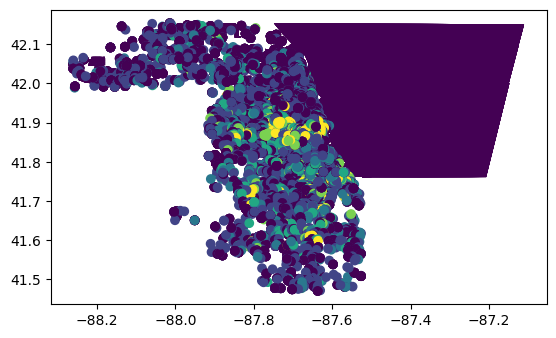

In [21]:
##why does my plot look bad

filtered_df.plot('deaths', vmax=5)